In [1]:
#Import pustaka yang dibutuhkan
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
#Memanggil data yang akan digunakan
df = pd.read_csv('C:\\Users\\Gaming\\Documents\\Jupiter\\archive2\\nyc-rolling-sales.csv')
print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


### Eksplorasi Data

In [3]:
#memeriksa tipe kolom pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
#memeriksa apakah terdapat data yang kosong
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [6]:
#melihat statistik dari data yang dimasukkan
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [7]:
# Konversi kolom 'SALE PRICE' ke tipe data numerik
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Konversi kolom 'SALE DATE' ke tipe data datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], format='%Y-%m-%d %H:%M:%S')

In [8]:
#memeriksa tipe kolom pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      84548 non-null  int64         
 1   BOROUGH                         84548 non-null  int64         
 2   NEIGHBORHOOD                    84548 non-null  object        
 3   BUILDING CLASS CATEGORY         84548 non-null  object        
 4   TAX CLASS AT PRESENT            84548 non-null  object        
 5   BLOCK                           84548 non-null  int64         
 6   LOT                             84548 non-null  int64         
 7   EASE-MENT                       84548 non-null  object        
 8   BUILDING CLASS AT PRESENT       84548 non-null  object        
 9   ADDRESS                         84548 non-null  object        
 10  APARTMENT NUMBER                84548 non-null  object        
 11  ZI

In [9]:
#Membagi dataset menjadi dua kelompok
property_1900_to_2000 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 2000)]
propertyabove_2001= df[df['YEAR BUILT'] >= 2001]

#Definisikan kelompok
property_1 = property_1900_to_2000
property_2 = propertyabove_2001

### Mean

In [10]:
# Mencari nilai mean
mean_property_1= property_1['TOTAL UNITS'].mean()
mean_property_2 = property_2['TOTAL UNITS'].mean()

# Tampilkan
print("Mean Units for Properties Built 1900-2000:", mean_property_1)
print("Mean Units for Properties Built 2001 and Onwards:", mean_property_2)

Mean Units for Properties Built 1900-2000: 2.432037617554859
Mean Units for Properties Built 2001 and Onwards: 2.2001194743130226


### Median

In [11]:
# Mencari nilai median
median_property_1 = property_1['TOTAL UNITS'].median()
median_property_2 = property_2['TOTAL UNITS'].median()

# Tampilkan
print("median Units for Properties Built 1900-2000:", median_property_1)
print("median Units for Properties Built 2001 and Onwards:", median_property_2)

median Units for Properties Built 1900-2000: 1.0
median Units for Properties Built 2001 and Onwards: 1.0


### Modus

In [12]:
# Mencari nilai modus
mode_property_1 = property_1['TOTAL UNITS'].mode()
mode_property_2 = property_2['TOTAL UNITS'].mode()

# Tampilkan
print("Modus Units for Properties Built 1900-2000:", mode_property_1)
print("Modus Units for Properties Built 2001 and Onwards:", mode_property_2)

Modus Units for Properties Built 1900-2000: 0    1
Name: TOTAL UNITS, dtype: int64
Modus Units for Properties Built 2001 and Onwards: 0    1
Name: TOTAL UNITS, dtype: int64


### Range

In [13]:
# Menghitung nilai max dan min tahun 1900-2000
min_value_1 = property_1['TOTAL UNITS'].min()
max_value_1 = property_1['TOTAL UNITS'].max()

# Menghitung nilai max dan min tahun 2001 keatas
min_value_2 = property_2['TOTAL UNITS'].min()
max_value_2 = property_2['TOTAL UNITS'].max()

# Menghitung range
data_range_property_1 = max_value_1 - min_value_1
data_range_property_2 = max_value_2 - min_value_2

# Tampilkan
print("Range Units for Properties Built 1900-2000")
print("Minimum Value:", min_value_1)
print("Maximum Value:", max_value_1)
print("Range:", data_range_property_1)

print("Range Units for Properties Built 2001 and Onwards")
print("Minimum Value:", min_value_2)
print("Maximum Value:", max_value_2)
print("Range:", data_range_property_2)

Range Units for Properties Built 1900-2000
Minimum Value: 0
Maximum Value: 2261
Range: 2261
Range Units for Properties Built 2001 and Onwards
Minimum Value: 0
Maximum Value: 551
Range: 551


### Varian

In [14]:
# Menghitung varian
variance_total = df['TOTAL UNITS'].var()
variance_1 = property_1['TOTAL UNITS'].var()
variance_2 = property_2['TOTAL UNITS'].var()

# Tampilkan
print("Varian dari 'TOTAL UNITS':", variance_total)
print("Varian dari 'TOTAL UNITS' tahun 1900-2000:", variance_1)
print("Varian dari 'TOTAL UNITS' tahun 2001 keatas:", variance_2)

Varian dari 'TOTAL UNITS': 359.95896003024995
Varian dari 'TOTAL UNITS' tahun 1900-2000: 439.0597864399042
Varian dari 'TOTAL UNITS' tahun 2001 keatas: 191.27163265619595


### Standard Deviasi

In [37]:
# Filter data untuk tahun 1900-2000
data_1900_2000 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 2000)]

# Filter data untuk tahun 2001 keatas
data_2001_above = df[df['YEAR BUILT'] >= 2001]

# menghitung standard deviasi
std_dev_1900_2000 = np.std(data_1900_2000['TOTAL UNITS'], ddof=1)
std_dev_2001_above = np.std(data_2001_above['TOTAL UNITS'], ddof=1)

# cetak hasil
print(f"Standard Deviation of 'TOTAL UNITS' for the year range 1900-2000: {std_dev_1900_2000}")
print(f"Standard Deviation of 'TOTAL UNITS' for the year range 2001 and later: {std_dev_2001_above}")

Standard Deviation of 'TOTAL UNITS' for the year range 1900-2000: 20.9537535167307
Standard Deviation of 'TOTAL UNITS' for the year range 2001 and later: 13.830098794158918


### Distribusi Data

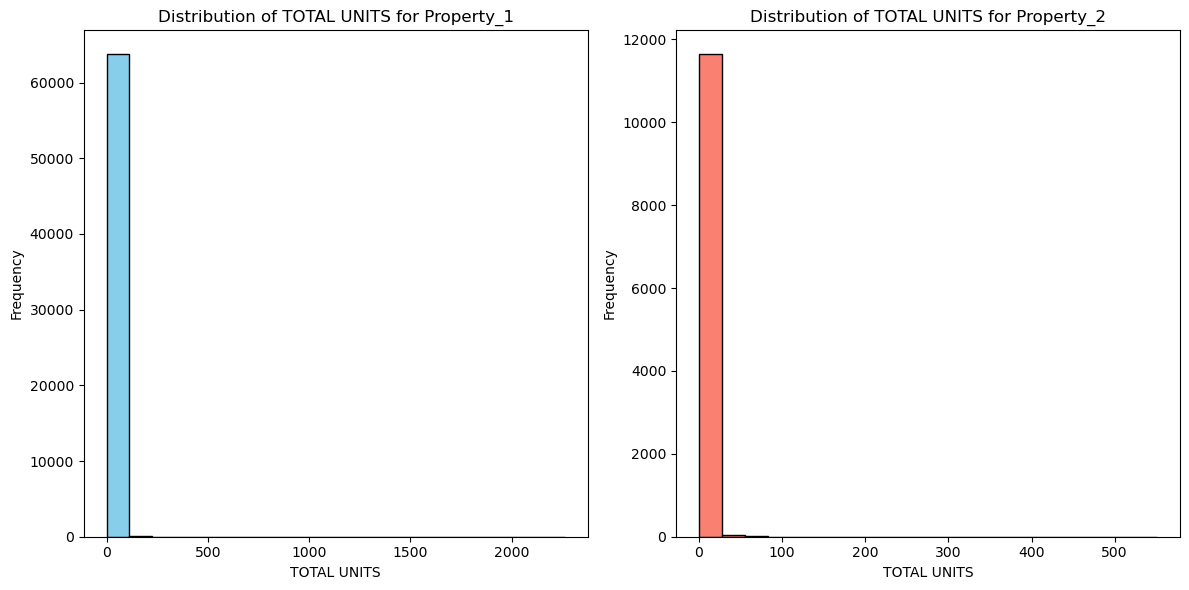

In [16]:
import matplotlib.pyplot as plt

# buat histograms
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Plot histograms untuk property_1
plt.subplot(1, 2, 1)
plt.hist(property_1['TOTAL UNITS'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('TOTAL UNITS')
plt.ylabel('Frequency')
plt.title('Distribution of TOTAL UNITS for Property_1')

# Plot histograms untuk property_2
plt.subplot(1, 2, 2)
plt.hist(property_2['TOTAL UNITS'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('TOTAL UNITS')
plt.ylabel('Frequency')
plt.title('Distribution of TOTAL UNITS for Property_2')

plt.tight_layout() 
plt.show()

### Confident Intervals

In [38]:
import scipy.stats as stats

# Filter data untuk tahun 1900-2000
data_1900_2000 = df[(df['YEAR BUILT'] >= 1900) & (df['YEAR BUILT'] <= 2000)]

# Filter data untuk tahun 2001 keatas
data_2001_above = df[df['YEAR BUILT'] >= 2001]

# confident intervals
confidence_level = 0.95  # tingkat kepercayaan 95%

# Fungsi untuk menghitung confidence interval
def calculate_confidence_interval(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=n-1) * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Hitung confidence interval untuk rentang tahun 1900-2000
ci_1900_2000 = calculate_confidence_interval(data_1900_2000['TOTAL UNITS'])

# Hitung confidence interval untuk rentang tahun 2001 ke atas
ci_2001_above = calculate_confidence_interval(data_2001_above['TOTAL UNITS'])

# Cetak hasil
print(f"{int(confidence_level * 100)}% Confidence Interval for 'TOTAL UNITS' tahun 1900-2000: {ci_1900_2000}")
print(f"{int(confidence_level * 100)}% Confidence Interval for 'TOTAL UNITS' tahun 2001 ke atas: {ci_2001_above}")

95% Confidence Interval for 'TOTAL UNITS' tahun 1900-2000: (2.269442379625782, 2.594632855483936)
95% Confidence Interval for 'TOTAL UNITS' tahun 2001 ke atas: (1.9496865115667386, 2.4505524370593066)


## Hipotesis

### Hipotesis Nol (H0): Tidak ada perbedaan yang signifikan dalam rata-rata 'TOTAL UNITS' antara tahun 1900-2000 dan tahun 2001 ke atas pada properti-properti dalam dataset ini.
### Hipotesis Alternatif (H1): Terdapat perbedaan yang signifikan dalam rata-rata 'TOTAL UNITS' antara tahun 1900-2000 dan tahun 2001 ke atas pada properti-properti dalam dataset ini.

## Kesimpulan

###  Rata-rata jumlah unit untuk properti yang dibangun antara tahun 1900-2000 adalah sekitar 2.43, sedangkan rata-rata untuk properti yang dibangun pada tahun 2001 ke atas adalah sekitar 2.20.
### Median jumlah unit untuk kedua rentang tahun adalah 1, yang menunjukkan bahwa sebagian besar properti memiliki satu unit.
### Modus (nilai paling sering muncul) jumlah unit untuk kedua rentang tahun adalah 1.
### Rentang (perbedaan antara nilai maksimum dan minimum) jumlah unit untuk properti yang dibangun antara tahun 1900-2000 lebih besar (2261) daripada properti yang dibangun pada tahun 2001 ke atas (551).
###  Varians untuk properti yang dibangun antara tahun 1900-2000 lebih tinggi (439.06) dibandingkan dengan tahun 2001 ke atas (191.27). Deviasi standar mengikuti pola yang sama, dengan deviasi standar yang lebih tinggi untuk tahun 1900-2000.
### Dalam tingkat kepercayaan 95%, confidence interval untuk tahun 1900-2000 adalah (2.27, 2.59), sedangkan untuk tahun 2001 ke atas adalah (1.95, 2.45).
### Berdasarkan analisis ini, terlihat bukti statistik yang cukup untuk menolak hipotesis nol. Ini berarti bahwa terdapat perbedaan yang signifikan dalam rata-rata 'TOTAL UNITS' antara tahun 1900-2000 dan tahun 2001 ke atas pada properti-properti dalam dataset ini.